<a href="https://colab.research.google.com/github/Arju-Jawla/Work-on-Significant-Wave-Height-data-for-2022-and-23/blob/main/SWH(22_23)_04_daymean_to_monmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Required Libraries

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

## 2. Loading the data

In [ ]:
# Open the daily mean NetCDF dataset
ds_daily = xr.open_dataset('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_daily_mean_22_23.nc')

In [ ]:
# Check the dataset to confirm it is loaded correctly
print(ds_daily)

<xarray.Dataset> Size: 759MB
Dimensions:     (valid_time: 730, latitude: 361, longitude: 720)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 6kB 2022-01-01 ... 2023-12-31
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
    number      int32 4B ...
Data variables:
    swh         (valid_time, latitude, longitude) float32 759MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-07T06:55 GRIB to CDM+CF via cfgrib-0.9.1...


## 3. Daily mean to monthly mean using resamppling method


In [ ]:
# Resample to monthly data
ds_monthly = ds_daily.resample(valid_time='1ME').mean()

In [ ]:
# Check the result
print(ds_monthly)

<xarray.Dataset> Size: 25MB
Dimensions:     (valid_time: 24, latitude: 361, longitude: 720)
Coordinates:
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
    number      int32 4B 0
  * valid_time  (valid_time) datetime64[ns] 192B 2022-01-31 ... 2023-12-31
Data variables:
    swh         (valid_time, latitude, longitude) float32 25MB nan nan ... nan
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-11-07T06:55 GRIB to CDM+CF via cfgrib-0.9.1...


### 3.1 Verify the Resampling

In [ ]:
# Print the new shape to confirm the data has been resampled
print(ds_monthly['swh'].shape)

(24, 361, 720)


In [ ]:
# Print the first month's data
print(ds_monthly['swh'].isel(valid_time=0))

<xarray.DataArray 'swh' (latitude: 361, longitude: 720)> Size: 1MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
    number      int32 4B 0
    valid_time  datetime64[ns] 8B 2022-01-31
Attributes: (12/32)
    GRIB_paramId:                             140229
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      259920
    GRIB_typeOfLevel:                         meanSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNu

## 4. Save the Monthly Mean Data

In [ ]:
# Save the resampled monthly data to a new NetCDF file
ds_monthly.to_netcdf('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_monthly_mean_22_23.nc')

### 4.1 Checking the data

In [ ]:
# Check for non-null values in the 'swh' variable (significant wave height)
non_null_values = ds_monthly['swh'].notnull()

# Sum the non-null values to see how many valid data points exist
non_null_count = non_null_values.sum()

# Print the count of non-null values
print(f"Non-null values count: {non_null_count}")

Non-null values count: <xarray.DataArray 'swh' ()> Size: 8B
array(3476950)
Coordinates:
    number   int32 4B 0


## 5. Visualize the Monthly Mean Data
### 5.1 Spatial Map for a Specific Month:

In [ ]:
# Plot the first month's data as a spatial map
first_month_data = ds_monthly['swh'].isel(valid_time=0)

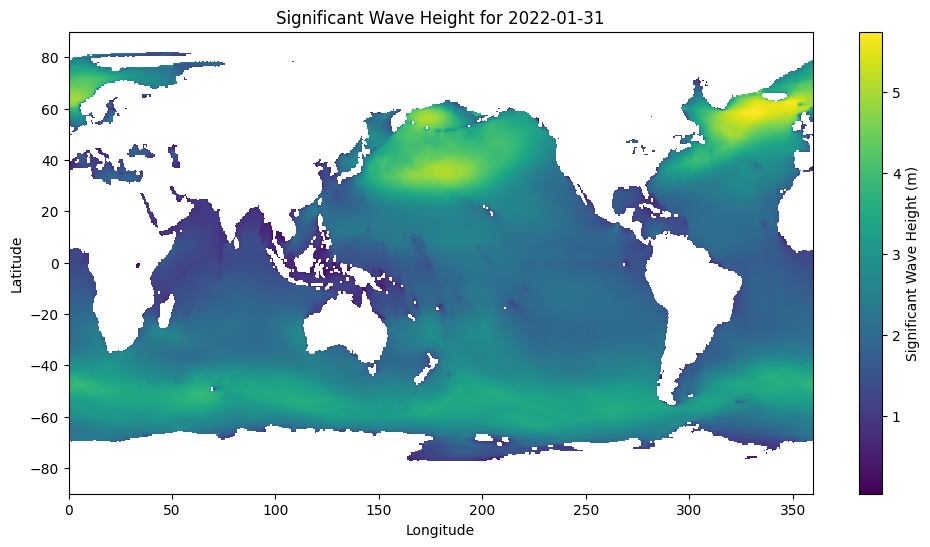

In [ ]:
plt.figure(figsize=(12, 6))
img = plt.imshow(first_month_data, cmap='viridis', aspect='auto', extent=[ds_monthly['longitude'].min(), ds_monthly['longitude'].max(),
                                                                         ds_monthly['latitude'].min(), ds_monthly['latitude'].max()])

# Add a colorbar
plt.colorbar(img, label='Significant Wave Height (m)')
plt.title(f'Significant Wave Height for {str(ds_monthly.valid_time[0].values)[:10]}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### 5.2 Contour Plot

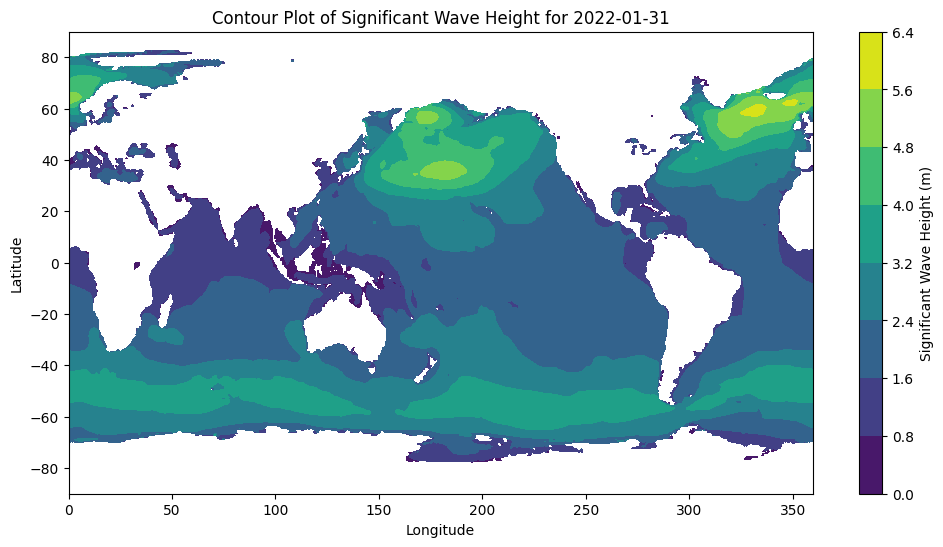

In [ ]:
# Contour plot for the first month of data using contourf
plt.figure(figsize=(12, 6))
contour = plt.contourf(ds_monthly['longitude'], ds_monthly['latitude'], first_month_data.values, cmap='viridis')

# Add a colorbar
plt.colorbar(contour, label='Significant Wave Height (m)')
plt.title(f'Contour Plot of Significant Wave Height for {str(ds_monthly.valid_time[0].values)[:10]}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()